In [1]:
using LinearAlgebra
using Polynomials
using Plots
using DataFrames

# Лабораторная работа 5
Для функции f(x)=cos(x) в оптимальных узлах известны значения f(x_k). С помощью схемы Эйткена найти значения f(x_wave). Сравнить результаты интерполирования с встроенной функцией.

# Задание узлов и значений функции 

In [2]:
function poly_mrx2x2_det(X)
    X[1,1]*X[2,2]-X[1,2]*X[2,1]
end

poly_mrx2x2_det (generic function with 1 method)

In [74]:
@time x = cos.((collect(0:4) .* 2 .+ 1) ./ 10 .* π) .* π/4 .+ π/4 

  0.000004 seconds (4 allocations: 512 bytes)


5-element Vector{Float64}:
 1.5323562045828372
 1.2470436210200624
 0.7853981633974483
 0.32375270577483417
 0.03844012221205939

In [3]:
x=[]
for k ∈ 0:4
    push!(x,π/4*cos(((2*k+1)/10)*π)+π/4)
end

x_wave=[π/12;(5/12)*π; (7/24)*π]

y=[]
for k ∈ 1:size(x)[1]
    push!(y,cos(x[k]))
end

y

5-element Vector{Any}:
 0.038430656115238826
 0.31812653850379724
 0.7071067811865476
 0.9480482611658502
 0.999261269473881

In [4]:
x

5-element Vector{Any}:
 1.5323562045828372
 1.2470436210200624
 0.7853981633974483
 0.32375270577483417
 0.03844012221205939

In [5]:
X_Xi=[]

for k ∈ 1:size(x)[1]
    push!(X_Xi,-fromroots([x[k]]))
end

X_Xi

5-element Vector{Any}:
 Polynomial(1.5323562045828372 - 1.0*x)
 Polynomial(1.2470436210200624 - 1.0*x)
 Polynomial(0.7853981633974483 - 1.0*x)
 Polynomial(0.32375270577483417 - 1.0*x)
 Polynomial(0.03844012221205939 - 1.0*x)

In [6]:
L_2=[]

for i ∈ 1:4
    M=[y[i] X_Xi[i];y[i+1] X_Xi[i+1]]
    push!(L_2,1/X_Xi[i+1](x[i])*poly_mrx2x2_det(M))
end
    
L_2

4-element Vector{Any}:
 Polynomial(1.540620694221565 - 0.98031386802475*x)
 Polynomial(1.3688794969286564 - 0.8425951913096347*x)
 Polynomial(1.1170209106064088 - 0.5219188795230547*x)
 Polynomial(1.006161190513553 - 0.17949789549595152*x)

In [7]:
L_3=[]

for i ∈ 1:3
    M=[L_2[i] X_Xi[i];L_2[i+1] X_Xi[i+2]]
    push!(L_3,1/X_Xi[i+2](x[i])*poly_mrx2x2_det(M))
end

L_3

3-element Vector{Any}:
 Polynomial(1.1883001156297117 - 0.467868395937983*x - 0.18437270786530652*x^2)
 Polynomial(1.0287064937221106 - 0.1366899077351343*x - 0.34731882063564723*x^2)
 Polynomial(1.000456102739143 - 0.013461227131001188*x - 0.4584206409823187*x^2)

In [8]:
L_4=[]

for i ∈ 1:2
    M=[L_3[i] X_Xi[i];L_3[i+1] X_Xi[i+3]]
    push!(L_4,1/X_Xi[i+3](x[i])*poly_mrx2x2_det(M))
end

L_4

2-element Vector{Any}:
 Polynomial(0.9859556106012604 + 0.0840719499136643*x - 0.6649852294176796*x^2 + 0.13482181123176284*x^3)
 Polynomial(0.9995575876487971 + 0.013832518549824169*x - 0.5639138389434276*x^2 + 0.09192578083403427*x^3)

In [9]:
L_5=[] 

M=[L_4[1] X_Xi[1];L_4[2] X_Xi[end]]
L_5=1/X_Xi[end](x[1])*poly_mrx2x2_det(M)

L_5

Polynomial(0.9999075816452493 + 0.002920266137762485*x - 0.5142961737743235*x^2 + 0.023166684966922188*x^3 + 0.028713815256379394*x^4)

## Вывод графиков системной функции cos(x), интерполяционного полинома и значений системной функции в данных точках

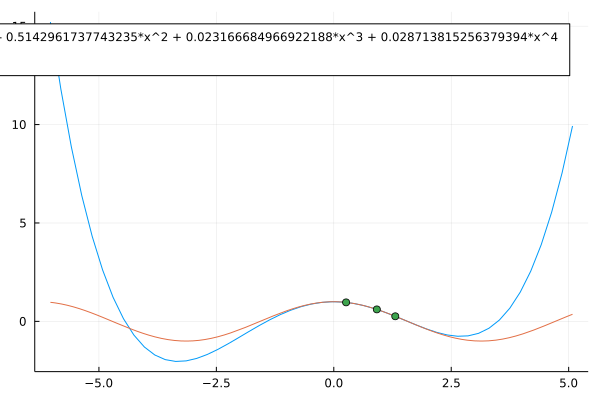

In [10]:
plot(L_5)
plot!(cos)
scatter!(([x_wave],[x_wave |> x->cos.(x)]))

In [11]:
L_2=[fill(missing,5-size(L_2)[1]); L_2]

L_3=[fill(missing,5-size(L_3)[1]); L_3]

L_4=[fill(missing,5-size(L_4)[1]); L_4]

L_5=[L_5]
L_5=[fill(missing,5-size(L_5)[1]); L_5]

5-element Vector{Union{Missing, Polynomial{Float64}}}:
 missing
 missing
 missing
 missing
 Polynomial(0.9999075816452493 + 0.002920266137762485*x - 0.5142961737743235*x^2 + 0.023166684966922188*x^3 + 0.028713815256379394*x^4)

# Таблицы значений

In [12]:
df = DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2,L3=L_3)

,X,Fx,Xi,L2,L3
,Any,Any,Any,Any,Any
1,1.53236,0.0384307,1.53236 - 1.0*x,missing,missing
2,1.24704,0.318127,1.24704 - 1.0*x,1.54062 - 0.980314*x,missing
3,0.785398,0.707107,0.785398 - 1.0*x,1.36888 - 0.842595*x,1.1883 - 0.467868*x - 0.184373*x^2
4,0.323753,0.948048,0.323753 - 1.0*x,1.11702 - 0.521919*x,1.02871 - 0.13669*x - 0.347319*x^2
5,0.0384401,0.999261,0.0384401 - 1.0*x,1.00616 - 0.179498*x,1.00046 - 0.0134612*x - 0.458421*x^2


In [13]:
df2=DataFrame(L4=L_4,L5=L_5)

,L4,L5
,Any,Polynom…?
1,missing,missing
2,missing,missing
3,missing,missing
4,0.985956 + 0.0840719*x - 0.664985*x^2 + 0.134822*x^3,missing
5,0.999558 + 0.0138325*x - 0.563914*x^2 + 0.0919258*x^3,0.999908 + 0.00292027*x - 0.514296*x^2 + 0.0231667*x^3 + 0.0287138*x^4


In [14]:
L_2x1=[]
for i ∈ 2:size(L_2)[1]
   push!(L_2x1,L_2[i](x_wave[1]))
end

L_3x1=[]
for i ∈ 3:size(L_3)[1]
   push!(L_3x1,L_3[i](x_wave[1]))
end

L_4x1=[]
for i ∈ 4:size(L_4)[1]
   push!(L_4x1,L_4[i](x_wave[1]))
end

L_5x1=[L_5[5](x_wave[1])]

1-element Vector{Float64}:
 0.9659733772351302

In [15]:
L_2x1=[fill(missing,5-size(L_2x1)[1]); L_2x1]

L_3x1=[fill(missing,5-size(L_3x1)[1]); L_3x1]

L_4x1=[fill(missing,5-size(L_4x1)[1]); L_4x1]

L_5x1=[fill(missing,5-size(L_5x1)[1]); L_5x1]

5-element Vector{Union{Missing, Float64}}:
  missing
  missing
  missing
  missing
 0.9659733772351302

## Таблицы значений

### x=π/12

In [16]:
df=DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2x1,L3=L_3x1,L4=L_4x1,L5=L_5x1)

,X,Fx,Xi,L2,L3,L4,L5
,Any,Any,Any,Any,Any,Any,Float64?
1,1.53236,0.0384307,1.53236 - 1.0*x,missing,missing,missing,missing
2,1.24704,0.318127,1.24704 - 1.0*x,1.28398,missing,missing,missing
3,0.785398,0.707107,0.785398 - 1.0*x,1.14829,1.05318,missing,missing
4,0.323753,0.948048,0.323753 - 1.0*x,0.980383,0.969116,0.964807,missing
5,0.0384401,0.999261,0.0384401 - 1.0*x,0.959169,0.965512,0.966178,0.965973


In [17]:
L_2x2=[]
for i ∈ 2:size(L_2)[1]
   push!(L_2x2,L_2[i](x_wave[2]))
end

L_3x2=[]
for i ∈ 3:size(L_3)[1]
   push!(L_3x2,L_3[i](x_wave[2]))
end

L_4x2=[]
for i ∈ 4:size(L_4)[1]
   push!(L_4x2,L_4[i](x_wave[2]))
end

L_5x2=[L_5[5](x_wave[2])]

1-element Vector{Float64}:
 0.25876233890367706

In [18]:
L_2x2=[fill(missing,5-size(L_2x2)[1]); L_2x2]

L_3x2=[fill(missing,5-size(L_3x2)[1]); L_3x2]

L_4x2=[fill(missing,5-size(L_4x2)[1]); L_4x2]

L_5x2=[fill(missing,5-size(L_5x2)[1]); L_5x2]

5-element Vector{Union{Missing, Float64}}:
  missing
  missing
  missing
  missing
 0.25876233890367706

### x=5/12π 

In [19]:
df=DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2x2,L3=L_3x2,L4=L_4x2,L5=L_5x2)

,X,Fx,Xi,L2,L3,L4,L5
,Any,Any,Any,Any,Any,Any,Float64?
1,1.53236,0.0384307,1.53236 - 1.0*x,missing,missing,missing,missing
2,1.24704,0.318127,1.24704 - 1.0*x,0.257393,missing,missing,missing
3,0.785398,0.707107,0.785398 - 1.0*x,0.265925,0.259944,missing,missing
4,0.323753,0.948048,0.323753 - 1.0*x,0.433831,0.254658,0.258967,missing
5,0.0384401,0.999261,0.0384401 - 1.0*x,0.771199,0.197344,0.257596,0.258762


In [20]:
L_2x3=[]
for i ∈ 2:size(L_2)[1]
   push!(L_2x3,L_2[i](x_wave[3]))
end

L_3x3=[]
for i ∈ 3:size(L_3)[1]
   push!(L_3x3,L_3[i](x_wave[3]))
end

L_4x3=[]
for i ∈ 4:size(L_4)[1]
   push!(L_4x3,L_4[i](x_wave[3]))
end

L_5x3=[L_5[5](x_wave[3])]

1-element Vector{Float64}:
 0.6088434196570344

In [21]:
L_2x3=[fill(missing,5-size(L_2x3)[1]); L_2x3]

L_3x3=[fill(missing,5-size(L_3x3)[1]); L_3x3]

L_4x3=[fill(missing,5-size(L_4x3)[1]); L_4x3]

L_5x3=[fill(missing,5-size(L_5x3)[1]); L_5x3]

5-element Vector{Union{Missing, Float64}}:
  missing
  missing
  missing
  missing
 0.6088434196570344

### x= 7/24 π

In [22]:
df=DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2x3,L3=L_3x3,L4=L_4x3,L5=L_5x3)

,X,Fx,Xi,L2,L3,L4,L5
,Any,Any,Any,Any,Any,Any,Float64?
1,1.53236,0.0384307,1.53236 - 1.0*x,missing,missing,missing,missing
2,1.24704,0.318127,1.24704 - 1.0*x,0.642361,missing,missing,missing
3,0.785398,0.707107,0.785398 - 1.0*x,0.596811,0.604794,missing,missing
4,0.323753,0.948048,0.323753 - 1.0*x,0.638788,0.611848,0.60839,missing
5,0.0384401,0.999261,0.0384401 - 1.0*x,0.841688,0.603231,0.60949,0.608843


## Сравним результаты лабораторной со значением максимальной ошибки

In [23]:
max_error=1/factorial(5)*((π/2)^5)/(2^9)

0.000155649660637045

In [24]:
poly_values_comp=[]
for i ∈ 1:size(x_wave)[1]
    push!(poly_values_comp,cos(x_wave[i]))
end
poly_values_lb5=(x_wave |> x->L_5[5].(x))

println(poly_values_comp)
println(poly_values_lb5)

error=abs.(poly_values_comp-poly_values_lb5)

Any[0.9659258262890683, 0.25881904510252074, 0.6087614290087207]
[0.9659733772351302, 0.25876233890367706, 0.6088434196570344]


3-element Vector{Float64}:
 4.75509460619028e-5
 5.670619884368122e-5
 8.199064831371228e-5